# Data Cleanup

In [1]:
import csv
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

checkout_data = pd.read_csv('data/Checkouts_By_Title_Data_Lens_2017.csv')
checkout_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034542 entries, 0 to 5034541
Data columns (total 6 columns):
BibNumber           5034542 non-null int64
ItemBarcode         5034542 non-null int64
ItemType            5034542 non-null object
Collection          5034542 non-null object
CallNumber          5034464 non-null object
CheckoutDateTime    5034542 non-null object
dtypes: int64(2), object(4)
memory usage: 230.5+ MB


In [2]:
checkout_data.head()

,BibNumber,ItemBarcode,ItemType,Collection,CallNumber,CheckoutDateTime
0,2543647,10063298235,accd,nacd,CD 782.42166 C6606So,01/02/2017 08:13:00 AM
1,3172300,10087522552,acbk,namys,MYSTERY COTTERI 2016,01/02/2017 08:13:00 AM
2,2393405,10054483200,acbk,camys,MYSTERY MAY2006,01/02/2017 08:24:00 AM
3,3199718,10088153514,acdvd,nadvdnf,DVD 781.66092 M3347G 2013,01/02/2017 08:33:00 AM
4,3211526,10089643810,accd,nacd,CD 782.42166 Sh75o,01/02/2017 08:33:00 AM


In [3]:
checkout_data.drop(['ItemBarcode', 'CallNumber'], axis=1, inplace=True)

In [4]:
checkout_data.head()

,BibNumber,ItemType,Collection,CheckoutDateTime
0,2543647,accd,nacd,01/02/2017 08:13:00 AM
1,3172300,acbk,namys,01/02/2017 08:13:00 AM
2,2393405,acbk,camys,01/02/2017 08:24:00 AM
3,3199718,acdvd,nadvdnf,01/02/2017 08:33:00 AM
4,3211526,accd,nacd,01/02/2017 08:33:00 AM


In [5]:
checkout_data[pd.isnull(checkout_data).any(axis=1)]

,BibNumber,ItemType,Collection,CheckoutDateTime


In [6]:
inventory = pd.read_csv('data/Library_Collection_Inventory.csv')
inventory.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,09/01/2017,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,09/01/2017,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,09/01/2017,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,09/01/2017,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,09/01/2017,1


In [7]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687149 entries, 0 to 2687148
Data columns (total 13 columns):
BibNum             int64
Title              object
Author             object
ISBN               object
PublicationYear    object
Publisher          object
Subjects           object
ItemType           object
ItemCollection     object
FloatingItem       object
ItemLocation       object
ReportDate         object
ItemCount          int64
dtypes: int64(2), object(11)
memory usage: 266.5+ MB


In [8]:
inventory.drop(['ISBN','ItemType', 'ItemCollection', 'FloatingItem', 'ItemLocation','ReportDate'], axis=1, inplace=True)
combined_inv = inventory.groupby(['BibNum', 'Title', 'Author', 'PublicationYear', 'Publisher', 'Subjects'], as_index=False)['ItemCount'].sum()

In [9]:
combined_inv.head()

,BibNum,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
0,4,Erotic art of the East; the sexual theme in or...,"Rawson, Philip S.",[1968],"Putnam,","Erotic art East Asia, Art Asian",2
1,7,"Birdless summer; China: autobiography, history.","Han, Suyin, 1917-2012",[1968],"Putnam,","Han Suyin 1917 2012, Authors Chinese 20th cent...",2
2,12,Combat aircraft of the world; from 1909 to the...,"Taylor, John W. R. (John William Ransom), 1922...",[1969],Putnam,Airplanes Military,2
3,21,Stained glass in French cathedrals. [Translate...,"Witzleben, Elisabeth von, 1905-",[1968],Reynal,Glass painting and staining France,2
4,24,The history & folklore of American country tin...,"Coffin, Margaret",[1968],T. Nelson,"Tinware United States, Tinsmiths United States...",2


In [10]:
merged = pd.merge(left=checkout_data, right = combined_inv, how='left', left_on='BibNumber', right_on='BibNum')
merged.head()

,BibNumber,ItemType,Collection,CheckoutDateTime,BibNum,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
0,2543647,accd,nacd,01/02/2017 08:13:00 AM,2543647.0,Songs from a room [sound recording] / Leonard ...,"Cohen, Leonard, 1934-2016",p2007.,"Columbia/Legacy,",Popular music 1961 1970,23.0
1,3172300,acbk,namys,01/02/2017 08:13:00 AM,3172300.0,I shot the Buddha / Colin Cotterill.,"Cotterill, Colin",[2016].,"Soho Crime,",Paiboun Siri Doctor Fictitious character Ficti...,34.0
2,2393405,acbk,camys,01/02/2017 08:24:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3199718,acdvd,nadvdnf,01/02/2017 08:33:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3211526,accd,nacd,01/02/2017 08:33:00 AM,3211526.0,Overdrive / Shonen Knife.,Shonen Knife (Musical group),[2014],"Good Charamel Records,","Rock music 2011 2020, Rock music Japan 2011 2020",8.0


In [11]:
merged.drop('BibNum', axis=1, inplace=True)

In [12]:
merged.head()

,BibNumber,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
0,2543647,accd,nacd,01/02/2017 08:13:00 AM,Songs from a room [sound recording] / Leonard ...,"Cohen, Leonard, 1934-2016",p2007.,"Columbia/Legacy,",Popular music 1961 1970,23.0
1,3172300,acbk,namys,01/02/2017 08:13:00 AM,I shot the Buddha / Colin Cotterill.,"Cotterill, Colin",[2016].,"Soho Crime,",Paiboun Siri Doctor Fictitious character Ficti...,34.0
2,2393405,acbk,camys,01/02/2017 08:24:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
3,3199718,acdvd,nadvdnf,01/02/2017 08:33:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
4,3211526,accd,nacd,01/02/2017 08:33:00 AM,Overdrive / Shonen Knife.,Shonen Knife (Musical group),[2014],"Good Charamel Records,","Rock music 2011 2020, Rock music Japan 2011 2020",8.0


In [13]:
merged.tail()

,BibNumber,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
5035432,2661830,accd,nacd,10/18/2017 07:58:00 PM,NaN,NaN,NaN,NaN,NaN,NaN
5035433,3208256,jcbk,cccomic,10/18/2017 07:58:00 PM,Princess Princess ever after / by Katie O'Neil...,"O'Neill, Katie (Cartoonist)",2016.,"Oni Press, Inc.,","Princesses Comic books strips etc, Cartoons an...",24.0
5035434,2831364,accd,cacd,10/18/2017 07:58:00 PM,Spark seeker [sound recording] / Matisyahu.,Matisyahu,p2012.,"Fallen Sparks Records,","Reggae music, Popular music 2011 2020",10.0
5035435,3282121,acdvd,nadvd,10/18/2017 07:59:00 PM,NaN,NaN,NaN,NaN,NaN,NaN
5035436,2486352,acdvd,nalndvd,10/18/2017 07:59:00 PM,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
discard_inv = merged[pd.isnull(merged).any(axis=1)]
clean_data = pd.concat([merged, discard_inv, discard_inv]).drop_duplicates(keep=False)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301413 entries, 0 to 5035434
Data columns (total 10 columns):
BibNumber           int64
ItemType            object
Collection          object
CheckoutDateTime    object
Title               object
Author              object
PublicationYear     object
Publisher           object
Subjects            object
ItemCount           float64
dtypes: float64(1), int64(1), object(8)
memory usage: 277.1+ MB


In [15]:
clean_data.reset_index(drop=True)
clean_data.head()

,BibNumber,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
0,2543647,accd,nacd,01/02/2017 08:13:00 AM,Songs from a room [sound recording] / Leonard ...,"Cohen, Leonard, 1934-2016",p2007.,"Columbia/Legacy,",Popular music 1961 1970,23.0
1,3172300,acbk,namys,01/02/2017 08:13:00 AM,I shot the Buddha / Colin Cotterill.,"Cotterill, Colin",[2016].,"Soho Crime,",Paiboun Siri Doctor Fictitious character Ficti...,34.0
4,3211526,accd,nacd,01/02/2017 08:33:00 AM,Overdrive / Shonen Knife.,Shonen Knife (Musical group),[2014],"Good Charamel Records,","Rock music 2011 2020, Rock music Japan 2011 2020",8.0
5,2743540,acbk,nanf,01/02/2017 08:33:00 AM,Loving someone with borderline personality dis...,"Manning, Shari Y.",c2011.,"Guilford Press,","Borderline personality disorder, Interpersonal...",9.0
6,3100439,accd,cacdnf,01/02/2017 08:48:00 AM,Do no harm [sound recording] : [stories of lif...,"Marsh, Henry, 1950-",p2015.,"Highbridge Co.,","Marsh Henry 1950, Nervous system Surgery Engla...",8.0


In [16]:
clean_data.drop(['BibNumber'], axis=1, inplace=True)

In [17]:
item_data = pd.read_csv('data/Integrated_Library_System__ILS__Data_Dictionary.csv')
item_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Code                 555 non-null object
Description          555 non-null object
Code Type            555 non-null object
Format Group         526 non-null object
Format Subgroup      477 non-null object
Category Group       258 non-null object
Category Subgroup    36 non-null object
dtypes: object(7)
memory usage: 30.4+ KB


In [18]:
item_types = item_data.loc[item_data['Code Type'] == 'ItemType']
item_collection = item_data.loc[item_data['Code Type'] == 'ItemCollection']

In [19]:
item_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 499
Data columns (total 7 columns):
Code                 107 non-null object
Description          107 non-null object
Code Type            107 non-null object
Format Group         106 non-null object
Format Subgroup      84 non-null object
Category Group       36 non-null object
Category Subgroup    0 non-null object
dtypes: object(7)
memory usage: 6.7+ KB


In [20]:
item_types.head()

,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
0,pkbknh,Peak Picks Book,ItemType,NaN,NaN,NaN,NaN
1,acart,Framed Art: Adult/YA,ItemType,Media,Art,NaN,NaN
2,acbk,Book: Adult/YA,ItemType,Print,Book,NaN,NaN
3,accas,Audio Tape: Adult/YA,ItemType,Media,Audio Tape,NaN,NaN
4,accd,CD: Adult/YA,ItemType,Media,Audio Disc,NaN,NaN


In [21]:
item_collection.head()

,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
38,cabob,CA-Books on Bikes,ItemCollection,Print,Book,NaN,NaN
39,cacd,CA8-Music CD,ItemCollection,Media,Audio Disc,NaN,NaN
40,cadocmf,CA6-Microform - Documents,ItemCollection,Media,Document,NaN,NaN
41,cadocpt,CA6-Poster - DOC,ItemCollection,Media,Document,NaN,NaN
42,caesl,CA1-ESL,ItemCollection,Print,Book,NaN,NaN


In [22]:
clean_data['ItemType'].head()

0    accd
1    acbk
4    accd
5    acbk
6    accd
Name: ItemType, dtype: object

In [23]:
clean_data['ItemType'] = clean_data['ItemType'].map(item_types.set_index('Code')['Description'])
clean_data['Collection'] = clean_data['Collection'].map(item_collection.set_index('Code')['Description'])
clean_data.head()

,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
0,CD: Adult/YA,NA-Compact Discs,01/02/2017 08:13:00 AM,Songs from a room [sound recording] / Leonard ...,"Cohen, Leonard, 1934-2016",p2007.,"Columbia/Legacy,",Popular music 1961 1970,23.0
1,Book: Adult/YA,NA-Mysteries,01/02/2017 08:13:00 AM,I shot the Buddha / Colin Cotterill.,"Cotterill, Colin",[2016].,"Soho Crime,",Paiboun Siri Doctor Fictitious character Ficti...,34.0
4,CD: Adult/YA,NA-Compact Discs,01/02/2017 08:33:00 AM,Overdrive / Shonen Knife.,Shonen Knife (Musical group),[2014],"Good Charamel Records,","Rock music 2011 2020, Rock music Japan 2011 2020",8.0
5,Book: Adult/YA,NA-Nonfiction,01/02/2017 08:33:00 AM,Loving someone with borderline personality dis...,"Manning, Shari Y.",c2011.,"Guilford Press,","Borderline personality disorder, Interpersonal...",9.0
6,CD: Adult/YA,"CA7-Books on CD, Nonfiction",01/02/2017 08:48:00 AM,Do no harm [sound recording] : [stories of lif...,"Marsh, Henry, 1950-",p2015.,"Highbridge Co.,","Marsh Henry 1950, Nervous system Surgery Engla...",8.0


In [36]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301413 entries, 0 to 5035434
Data columns (total 9 columns):
ItemType            object
Collection          object
CheckoutDateTime    object
Title               object
Author              object
PublicationYear     object
Publisher           object
Subjects            object
ItemCount           float64
dtypes: float64(1), object(8)
memory usage: 251.9+ MB


# Storytelling

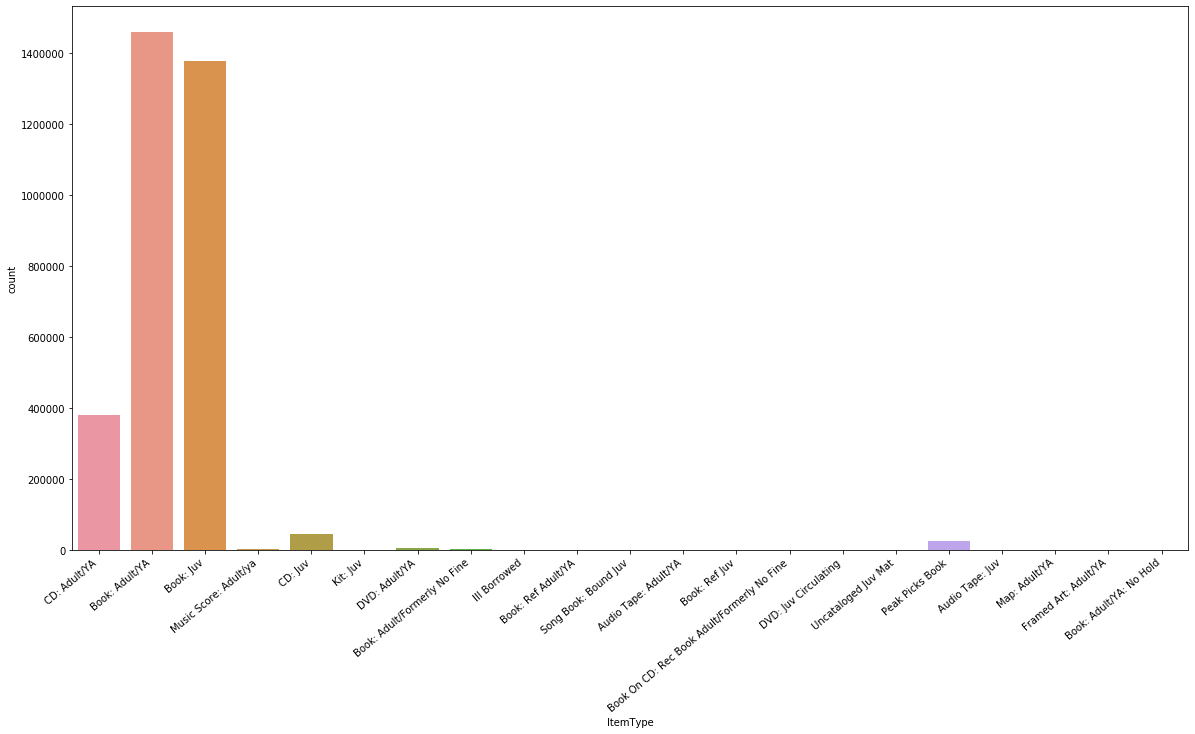

In [25]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='ItemType', data = clean_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [26]:
cd_data = clean_data.loc[clean_data['ItemType'] == 'CD: Adult/YA']
cd_data.head()

,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
0,CD: Adult/YA,NA-Compact Discs,01/02/2017 08:13:00 AM,Songs from a room [sound recording] / Leonard ...,"Cohen, Leonard, 1934-2016",p2007.,"Columbia/Legacy,",Popular music 1961 1970,23.0
4,CD: Adult/YA,NA-Compact Discs,01/02/2017 08:33:00 AM,Overdrive / Shonen Knife.,Shonen Knife (Musical group),[2014],"Good Charamel Records,","Rock music 2011 2020, Rock music Japan 2011 2020",8.0
6,CD: Adult/YA,"CA7-Books on CD, Nonfiction",01/02/2017 08:48:00 AM,Do no harm [sound recording] : [stories of lif...,"Marsh, Henry, 1950-",p2015.,"Highbridge Co.,","Marsh Henry 1950, Nervous system Surgery Engla...",8.0
7,CD: Adult/YA,"CA7-Books on CD, Nonfiction",01/02/2017 08:48:00 AM,The emperor of all maladies [sound recording] ...,"Mukherjee, Siddhartha",p2010.,"Tantor Audio,","Cancer History, Leukemia History",4.0
8,CD: Adult/YA,"CA7-Books on CD, Nonfiction",01/02/2017 08:48:00 AM,Playing to the edge : [American intelligence i...,"Hayden, Michael V. (Michael Vincent), 1945-",[2016],"Penguin Audio,","Intelligence service United States, National s...",4.0


In [27]:
adultbook_data = clean_data.loc[clean_data['ItemType'] == 'Book: Adult/YA']
adultbook_data.head()

,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
1,Book: Adult/YA,NA-Mysteries,01/02/2017 08:13:00 AM,I shot the Buddha / Colin Cotterill.,"Cotterill, Colin",[2016].,"Soho Crime,",Paiboun Siri Doctor Fictitious character Ficti...,34.0
5,Book: Adult/YA,NA-Nonfiction,01/02/2017 08:33:00 AM,Loving someone with borderline personality dis...,"Manning, Shari Y.",c2011.,"Guilford Press,","Borderline personality disorder, Interpersonal...",9.0
11,Book: Adult/YA,NA-Nonfiction,01/02/2017 08:51:00 AM,Zakka embroidery : simple one- and two-color e...,"Higuchi, Yumiko, 1975-",[2016],"Roost,","Embroidery Japan Patterns, Textile crafts Japan",12.0
14,Book: Adult/YA,NA-Fiction,01/02/2017 09:33:00 AM,Before the fall / Noah Hawley.,"Hawley, Noah",2016.,"Grand Central Publishing,","Aircraft accident victims Fiction, Airplane cr...",92.0
15,Book: Adult/YA,NA-Fiction,01/02/2017 09:33:00 AM,The woman in cabin 10 / Ruth Ware.,"Ware, Ruth.",2016.,"Scout Press,","Women journalists Fiction, Cruise ships Fictio...",148.0


In [28]:
juvbook_data = clean_data.loc[clean_data['ItemType'] == 'Book: Juv']
juvbook_data.head()

,ItemType,Collection,CheckoutDateTime,Title,Author,PublicationYear,Publisher,Subjects,ItemCount
55,Book: Juv,CC-Children's Picture Books,01/02/2017 11:00:00 AM,Aqualicious / written and illustrated by Victo...,"Kann, Victoria",[2015],"Harper, an imprint of HarperCollinsPublishers,","Mermaids Juvenile fiction, Beaches Juvenile fi...",33.0
64,Book: Juv,NC-Children's Fiction,01/02/2017 11:00:00 AM,We the children / Andrew Clements ; illustrate...,"Clements, Andrew, 1949-",2010.,"Atheneum Books for Young Readers,","Mystery and detective stories, Schools Juvenil...",10.0
65,Book: Juv,NC-Children's Fiction,01/02/2017 11:00:00 AM,Fantastic beasts & where to find them / Newt S...,"Rowling, J. K.",[2015],Arthur A. Levine Books an imprint of Scholasti...,Rowling J K Characters Animals Mythical Juveni...,63.0
67,Book: Juv,NC--Children's Readers,01/02/2017 11:00:00 AM,"Ride, Fly Guy, ride! / Tedd Arnold.","Arnold, Tedd",2012.,"Cartwheel Books,","Flies Juvenile fiction, Transportation Juvenil...",108.0
68,Book: Juv,NC--Children's Readers,01/02/2017 11:00:00 AM,Prince Fly Guy / Tedd Arnold.,"Arnold, Tedd",[2015],"Cartwheel Books, an imprint of Scholastic Inc.,","Flies Juvenile fiction, Imagination Juvenile f...",70.0


In [29]:
# plt.figure(figsize=(20,10))
# ax = sns.countplot(x='CheckoutDateTime', data = juvbook_data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# plt.show()

In [30]:
# plt.figure(figsize=(20,10))
# ax = sns.countplot(x='CheckoutDateTime', data = adultbook_data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# plt.show()

In [31]:
# plt.figure(figsize=(20,10))
# ax = sns.countplot(x='CheckoutDateTime', data = cd_data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# plt.show()

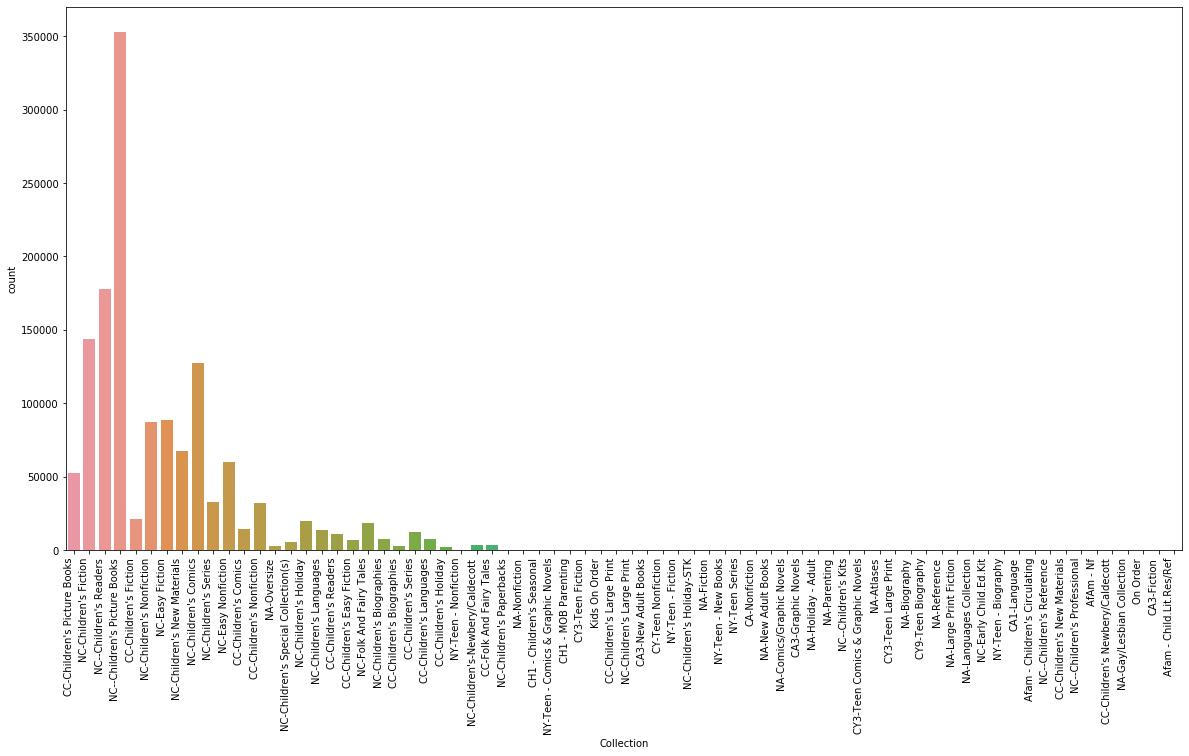

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Collection', data = juvbook_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

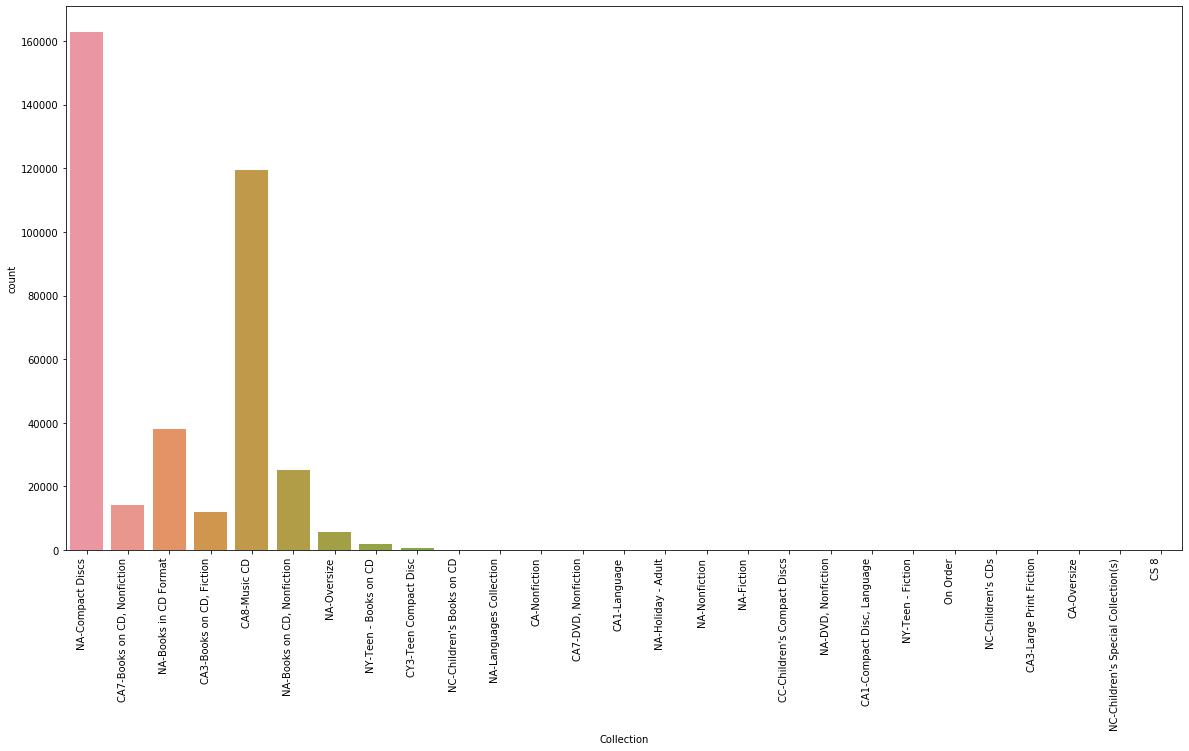

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Collection', data = cd_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

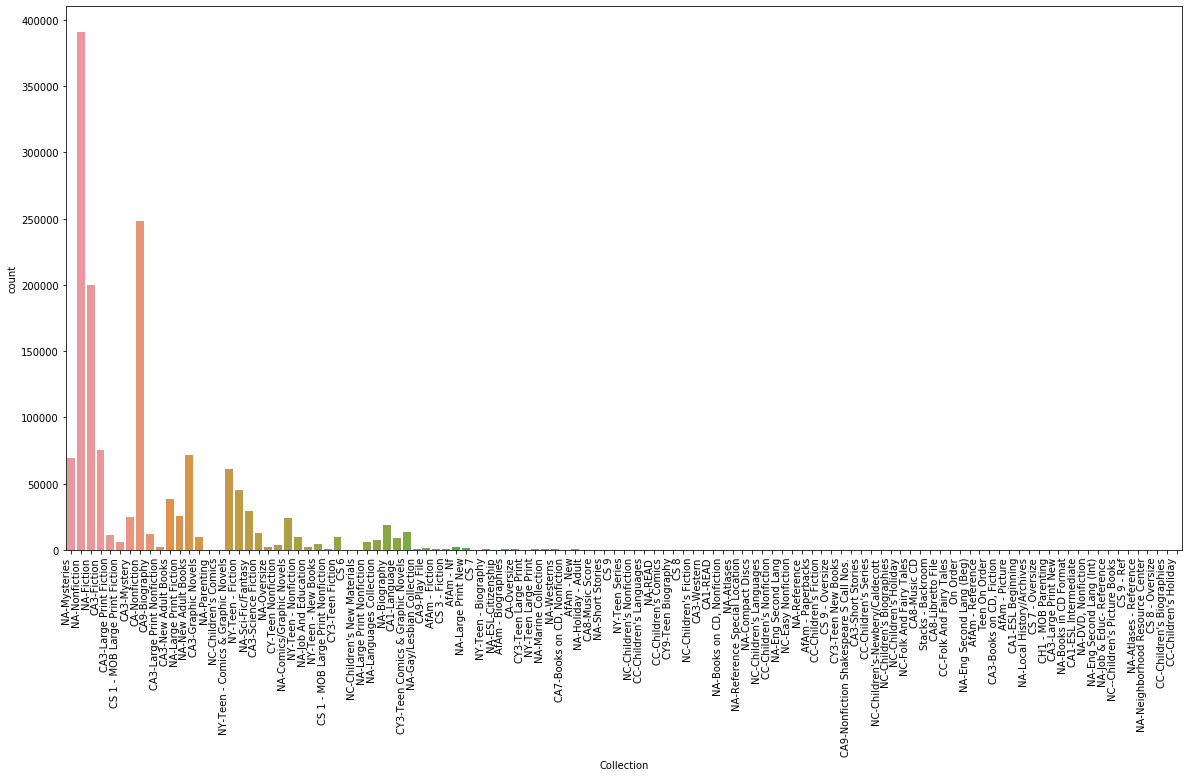

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Collection', data = adultbook_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()